# Loan 데이터 분류나무

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan.csv')
df

,y,loan,mortgage,job,workyear,delinquency,period,inquire,transact,DTI
0,1,1300,70053,Other,7,2,121.83,0,14,48.20
1,1,1500,13500,Other,4,0,149.47,1,10,40.86
2,1,1500,78553,Other,10,1,107.81,2,25,39.60
3,0,1700,97800,Office,3,0,93.33,0,14,48.65
4,1,1700,30548,Other,9,0,101.47,1,8,37.11
...,...,...,...,...,...,...,...,...,...,...
6986,1,1800,48649,Other,5,2,77.10,1,17,36.44
6987,1,1800,28502,Other,11,0,88.77,0,8,36.88
6988,1,2000,32700,Other,3,2,216.93,1,12,36.83
6989,1,2000,82919,Sales,16,0,115.80,0,13,29.26


In [3]:
df.isnull().sum().sum()

0

In [4]:
df.groupby('job').mean()

,y,loan,mortgage,workyear,delinquency,period,inquire,transact,DTI
job,,,,,,,,,
Mgr,0.279412,18947.905462,80028.710084,9.172269,0.558824,173.443193,1.477941,22.580882,36.054979
Office,0.180909,18104.440000,67958.616364,8.399091,0.436364,177.157945,1.017273,21.200909,34.772091
Other,0.232263,17911.422167,62103.232616,9.272503,0.374162,172.503607,1.288740,19.263678,34.464261
ProfExe,0.204577,18883.011096,92253.009709,8.751040,0.417476,194.267684,1.044383,24.070042,33.676685
Sales,0.414384,16926.616438,76520.465753,8.065068,0.400685,178.711438,1.184932,22.595890,36.410377
Self,0.403226,23403.201613,85134.940860,7.793011,0.534946,172.465457,1.411290,22.432796,36.581478


In [8]:
df['job'] = df['job'].replace({'Office':0, 'ProfExe':1, 'Other':2, 'Mgr':3, 'Self':4, 'Sales':5})
df.groupby('job').mean()

,y,loan,mortgage,workyear,delinquency,period,inquire,transact,DTI
job,,,,,,,,,
0,0.180909,18104.440000,67958.616364,8.399091,0.436364,177.157945,1.017273,21.200909,34.772091
1,0.204577,18883.011096,92253.009709,8.751040,0.417476,194.267684,1.044383,24.070042,33.676685
2,0.232263,17911.422167,62103.232616,9.272503,0.374162,172.503607,1.288740,19.263678,34.464261
3,0.279412,18947.905462,80028.710084,9.172269,0.558824,173.443193,1.477941,22.580882,36.054979
4,0.403226,23403.201613,85134.940860,7.793011,0.534946,172.465457,1.411290,22.432796,36.581478
5,0.414384,16926.616438,76520.465753,8.065068,0.400685,178.711438,1.184932,22.595890,36.410377


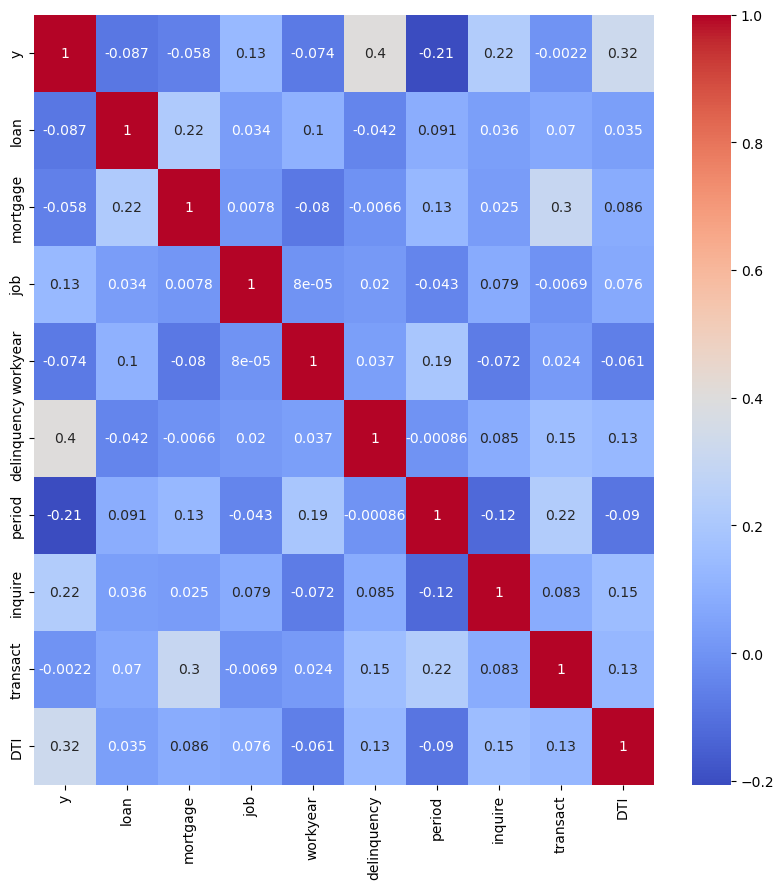

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

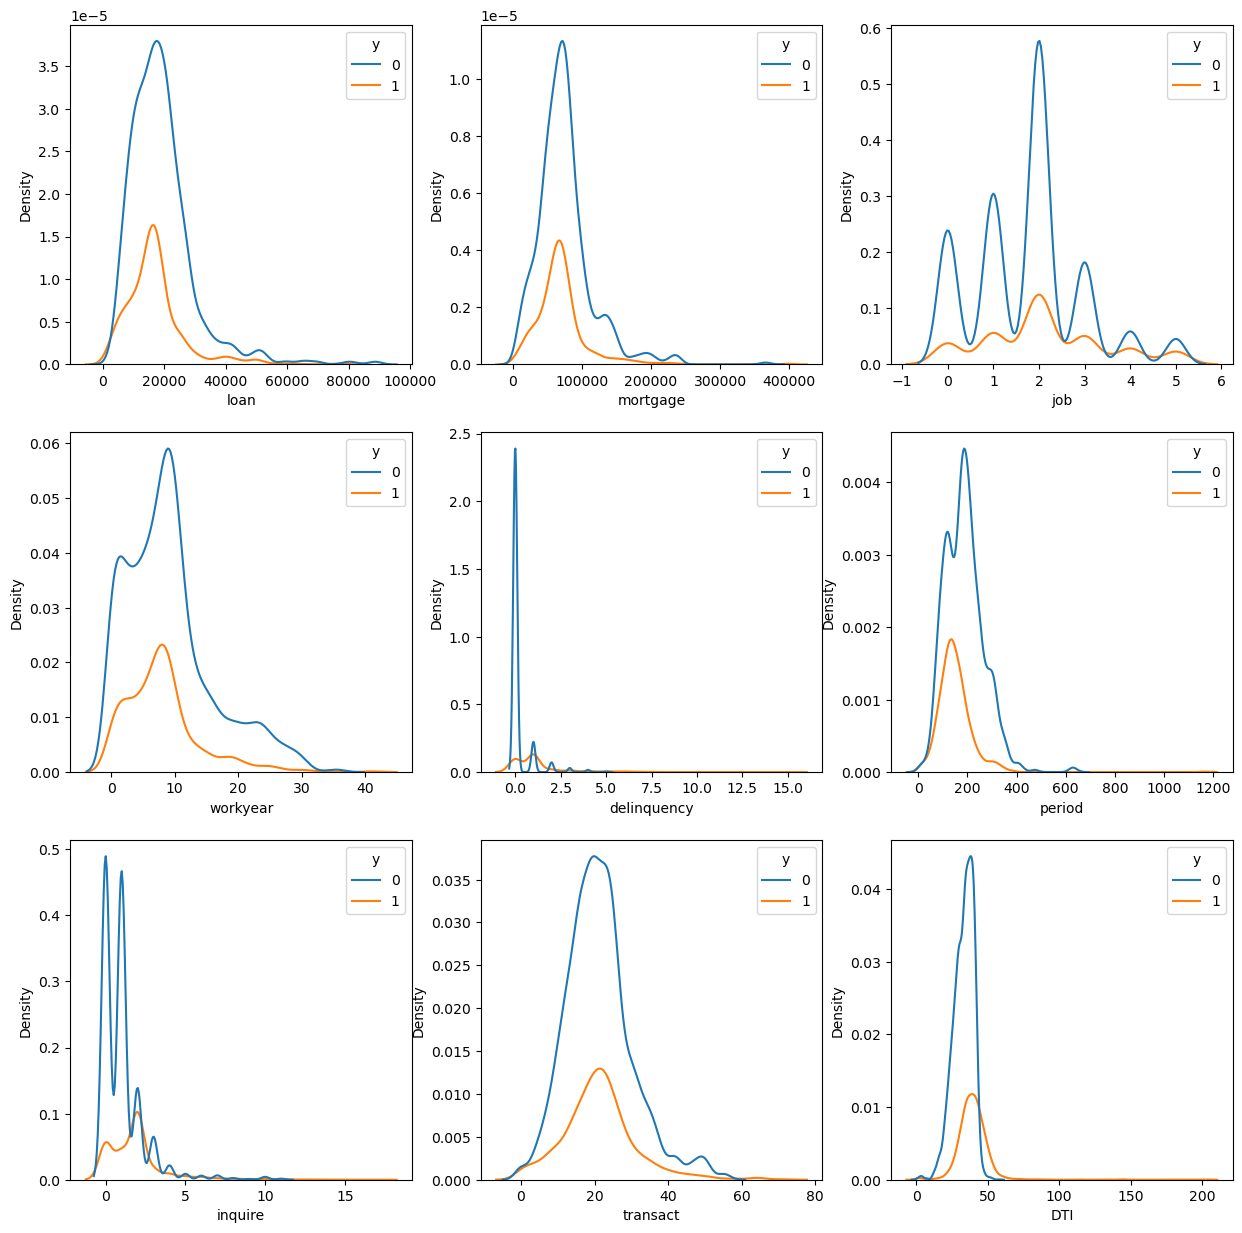

In [17]:
plt.figure(figsize=(15,15))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=df, x=df.columns[1:][i], hue="y")
plt.show()

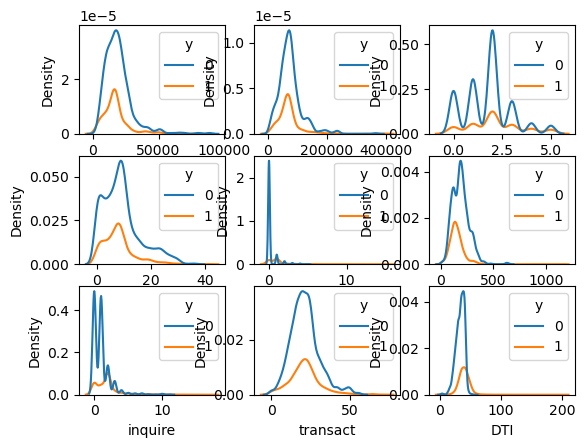

In [16]:
for i in range(0,9):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=df, x=df.columns[1:][i], hue="y")
    

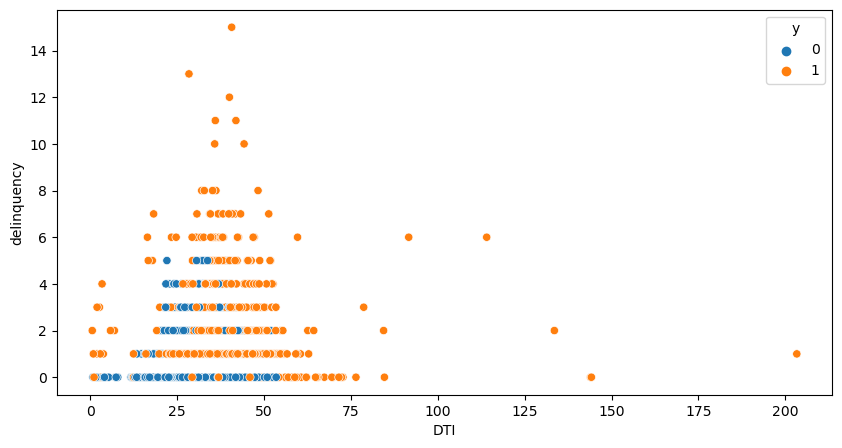

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='DTI', y='delinquency', hue='y')
plt.show()

### 나무 모형

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
X = df.drop(['y'], axis=1)
y = df['y']

### Default 트리

In [ ]:
c_tree = DecisionTreeClassifier(random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(20,15))
plot_tree(c_tree, filled=True) 
plt.show()